In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./Resources/lending_data.csv")
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [3]:
# Count of rows with null values
df.isna().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [4]:
y = df["loan_status"]
target_names = ["negative", "positive"]

In [5]:
X = df.drop("loan_status", axis=1)
feature_names = X.columns
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [6]:
# Assign X and y values
        
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [7]:
# Checking y 
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [8]:
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [9]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train.shape, X_test.shape

((58152, 7), (19384, 7))

# Logistic Regression (without Preprocessing or Feature Selection)

In [11]:
# Train a Logistic Regression model print the model score
# Step 1: Instantiate model
model = LogisticRegression()

In [12]:
# Step 2: # Fit the model to the tarinig data
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Evaluate the model
print("Train R2 Score: ", model.score(X_train, y_train))
print("Test R2 Score: ", model.score(X_test, y_test))

Train R2 Score:  0.9919177328380795
Test R2 Score:  0.9924680148576145


In [14]:
# Print at least 10 predictions vs. their actual labels
print("Actual first 10: ", list(y_test[:10]))
print("Prediction of first 10: ", model.predict(X_test[:10]))

Actual first 10:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Prediction of first 10:  [0 0 0 0 0 0 0 0 1 0]


/var/folders/p1/gmm0j2t92x506qp9p1glb_1m0000gn/T/ipykernel_34613/229215784.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual first 10: ", list(y_test[:10]))


In [15]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

#Assess other metrics for the model
y_true = y_test
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



# Preproessing of data and re-evaluation of Logistic Regression Model

In [17]:
# Normalize data using Standard scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Re-fit the sclaed data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Evaluate the model
print("Train R2 Score: ", model.score(X_train_scaled, y_train))
print("Test R2 Score: ", model.score(X_test_scaled, y_test))

Train R2 Score:  0.9941188609162196
Test R2 Score:  0.9941704498555509


In [20]:
#Assess other metrics for the model
y_true = y_test
y_pred = model.predict(X_test_scaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.98      0.91       592

    accuracy                           0.99     19384
   macro avg       0.93      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



# Random Forest Classifier Model (on preprocessed data)

In [21]:
# Fit a Random Forests classifier to the data
from sklearn.ensemble import RandomForestClassifier

# Step 1: Instantiate model
clf = RandomForestClassifier(random_state=1, n_estimators=500)

In [22]:
# Fit a Random Forests classifier to the data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [23]:
print(f"Training Score: {clf.score(X_train, y_train)}")
print(f"Testing Score: {clf.score(X_test, y_test)}")

Training Score: 0.9971970009629936
Testing Score: 0.9922100701609575


In [24]:
#Assess other metrics for the model
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



# Random Forest Classifier on Preprocessed Data

In [25]:
# Re-fit Random Forest classifier to the scaled data
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [26]:
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 0.9971970009629936
Testing Score: 0.991900536524969


In [27]:
#Assess other metrics for the model
y_true = y_test
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.84      0.90      0.87       592

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384



# Feature Selection and Re-evaluation of Random Forest Model

In [28]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances
feature_importance = clf.feature_importances_
print(feature_importance)

[1.20268418e-01 3.01393087e-01 1.76271265e-01 1.51317720e-01
 1.11568592e-01 1.18380419e-04 1.39062538e-01]


[1.20268418e-01 3.01393087e-01 1.76271265e-01 1.51317720e-01
 1.11568592e-01 1.18380419e-04 1.39062538e-01]


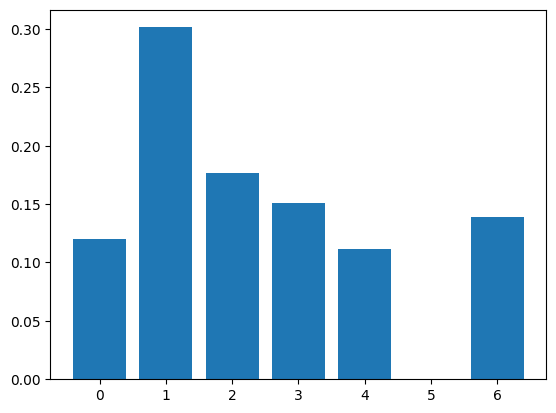

In [29]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [30]:
# Import SelectFromModel, create a selection model, and fit it to the training data
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False, False])

In [31]:
# Use the selection model to create a dataset with only the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/Farzana/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
# Create a RFC model, and fit it to the original dataset
new_clf = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {new_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {new_clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9974893382858715
Testing Score: 0.9917457697069748


In [33]:
predictions = new_clf.predict(X_selected_test_scaled)

In [38]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

